<h4 align="right">by Ali Siahkamari and <a href="http://cs-people.bu.edu/usmn/"> Ben Usman</a> <br> with help of Kate Saenko, <br> Brian Kulis and Kun He <br> </h4>
# Problem Set 1 


## Preamble

To run and solve this assignment, one must have a working IPython Notebook installation. The easiest way to set it up for both Windows and Linux is to install [Anaconda](https://www.continuum.io/downloads). Then save this file ([`pset1.ipynb`](https://gist.githubusercontent.com/MInner/eb6330a655a5c37b82e15d1c84fd4cd0/raw/)) to your computer, run Anaconda and choose this file in Anaconda's file explorer. Use `Python 3` version. Below statements assume that you have already followed these instructions. If you are new to Python or its scientific library, Numpy, there are some nice tutorials [here](https://www.learnpython.org/) and [here](http://www.scipy-lectures.org/).

To run code in a cell or to render [Markdown](https://en.wikipedia.org/wiki/Markdown)+[LaTeX](https://en.wikipedia.org/wiki/LaTeX) press `Ctr+Enter` or `[>|]`(like "play") button above. To edit any code or text cell [double]click on its content. To change cell type, choose "Markdown" or "Code" in the drop-down menu above.

We highly encourage students to put down their derivations into corresponding cells below. However, if one does not know LaTeX (and would find it too hard to learn it by looking at examples listed below between \$..\$), he or she might pass it in pen-and-paper format, however grading of these submissions might be delayed.

Put your solution into boxes marked with **`[double click here to add a solution]`** and press Ctr+Enter to render text. [Double]click on a cell to edit or to see its source code. You can add cells via **`+`** sign at the top left corner.

Submission instructions: please upload your completed solution file to Blackboard by the due date (see Schedule). If you have pen-and-paper answers, please hand them in in class on the same day. 

`Vector` stands for `column vector` below. Show all steps when proving statements.

### Problem 1: Closed-Form Maximum Likelihood

Assume that we are given $n$ iid samples $(x_1, ..., x_n)$ from each $P(x \ | \ \theta)$ given below. Compute the maximum likelihood estimates (MLEs) for the parameter $\theta$ $(\alpha,  \beta)$ of the given distributions. 


**Q1.1**: $P(x \ | \ \theta) = \frac{2 x}{\theta^2} e^{\frac{-x^2}{\theta^2}}$ for $x \geq 0$

**Q1.2**: $P(x \ | \ \theta) = \frac{1}{1-\theta}$ for $ \theta \leq x \leq 1$ 

**Q1.3**: $P(x \ | \ \alpha, \beta) \propto  \frac{1}{x^{\alpha+1}}$ for $ x \geq \beta$ 

**Hint for Q1.3:** first calculate the normalizing constant by making sure the density integrates to 1.


**`[double click here to add a solution]`**

**1.**

$$
L(\theta\vert x) = \frac{\prod_{i=1}^n 2x_i}{\theta^{2n}} \exp\left\{ - \frac{\sum_{i=1}^nx_i^2}{\theta^2} \right\}\\
\hat l(\theta\vert x) = \frac{1}{n} \ln L(\theta\vert x) = \ln 2 + \frac{1}{n} \sum_{i=1}^n\ln x_i - 2\ln \theta - \frac{\sum_{i=1}^n x_i^2 }{n\theta^2}\\
\frac{\partial}{\partial \theta}\hat l(\theta\vert x) = -\frac{2}{\theta} + \frac{3 \sum_{i=1}^n x_i^2}{n \theta^3}=0\\
\theta = \sqrt{\frac{3}{2n}\sum_{i=1}^n x_i^2}
$$

**2.**
$$
L(\theta\vert x) = (\frac{1}{1-\theta})^n.\\
\hat l(\theta\vert x) = \frac{1}{n} \ln L(\theta\vert x) = \ln\frac{1}{1 - \theta}\\
\frac{\partial}{\partial \theta}\hat l(\theta\vert x) = \frac{1}{1 - \theta} = 0
$$
Since $ \theta \le x \le 1$ ,$\frac{\partial}{\partial \theta}\hat l(\theta) \ge 0$. So that the function keep increasing when $ \theta $ increases. The max value appears at $ \theta = \min \{x_1,x_2,\ldots,x_n \}$.

**3.**

Suppose c is a constant.$ P(x\vert\alpha,\beta) = \frac{c}{x^{\alpha+1}}$.
$$
\int_{\beta}^{+\infty} \frac{c}{x^{\alpha +1}} dx = 1 \\
\left.\frac{-c}{(\alpha +1)x^{\alpha}}\right|_{\beta}^{+\infty} = 0 + \frac{c}{\alpha\beta^{\alpha}} = 1\\
c = \alpha\beta^{\alpha}\\
L(\alpha, \beta\vert x) = \alpha^n\beta^{n\alpha}\prod_{i=1}^n x_i^{-(\alpha +1)}\\
\hat l(\alpha,\beta\vert x) = \ln\alpha + \alpha\ln\beta -\frac{\alpha +1}{n}\sum_{i=1}^n \ln x_i
$$
It is easy to find out that we want $\beta$ as big as possible which means that $\beta = \min\{x_1,x_2,\ldots,x_n\}$.
$$
\frac{\partial}{\partial \alpha}\hat l = \frac{1}{\alpha} + \ln\beta - \frac{1}{n}\sum_{i=1}^n \ln x_i\\
\alpha = \frac{n}{\sum_{i=1}^n \ln x_i - \ln \beta}
$$
Using $\beta$ in this function we can get $\alpha = \frac{n}{\sum_{i=1}^n \ln x_i - \ln \min\{x_1,\ldots,x_n\}}$

### Problem 2: Matrix Derivatives

**Multivariate Gaussian**

Assume that our data is distributed according to a $\underline d$ dimensional [multivariate Gaussian](https://en.wikipedia.org/wiki/Multivariate_normal_distribution#Likelihood_function) with $\bar \mu$ mean and $\Sigma$ covariance matrix: $$(\mathbf x_1, \dots, \mathbf x_n) \sim \mathcal N(\bar \mu, \Sigma).$$ 

**Q2.1:** 
Using rules of [matrix derivatives](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf) [57, 59], derive $\frac{\partial \mathcal L(\theta)}{\partial \Sigma}$ in matrix form and set it to zero to find $\Sigma_{ML}$ . 


**`[double click here to add a solution]`**

$$
\mathcal N (\mathbf x \vert \bar \mu, \Sigma) = \frac{1}{\sqrt{(2\pi)^d \vert det \Sigma \vert}}\exp\left\{-\frac{1}{2}(\mathbf x - \bar \mu)^{\mathrm T} \Sigma^{-1}(\mathbf x- \bar \mu)\right\}\\
L( \bar \mu, \Sigma \vert \mathbf x ) =  \frac{1}{\sqrt{(2\pi)^{nd} \vert det \Sigma\vert^n}}\exp \left\{ - \frac{1}{2} \sum_{i=1}^{n} (\mathbf x_{i}-\bar \mu) ^{T} \Sigma^{-1} (\mathbf x_{i}-\bar \mu)\right\}\\
\hat l(\bar \mu, \Sigma) = \frac{1}{n}\ln L( \bar \mu, \Sigma \vert \mathbf x ) = -\frac{d}{2}\ln(2\pi) - \frac{1}{2} \ln \vert det \Sigma \vert - \frac{1}{2n} \sum_{i=1}^{n} (\mathbf x_{i}-\bar \mu) ^{T} \Sigma^{-1} (\mathbf x_{i}-\bar \mu)\\
$$
According to the rules in matrix derivatives,
$$
\frac{\partial \hat l(\theta)}{\partial \Sigma} = - \frac{1}{2}\Sigma^{-\mathrm T} + \frac{1}{2n} \sum_{i=1}^{n}\Sigma^{-T} (\mathbf x_i - \bar \mu)(\mathbf x_i -\bar \mu)^T\Sigma^{-T} = 0\\
\Sigma = \frac{1}{n}\sum_{i=1}^n (\mathbf x_i - \bar \mu)^{\mathrm T} (\mathbf x_i - \bar \mu)
$$

**Type ll maximum likelihood for multivariate Gaussian**

Maximum Likelihood is a fundamental technique of the frequentist view of statistics. In this view parameters are assumed to be deterministic unknowns. In a Bayesian veiw of statistics, parameters are assumed to be random variables instead. However, the distribution of these random variables(prior), could have parameters of their own. In order to assign values to these parameters we can do a type 2 maximum likelhood ([Empirical Bayes](https://en.wikipedia.org/wiki/Empirical_Bayes_method)). In a type 2 maximum likelhood we integrate out the parameters of the likelihood with the prior and perform a MLE for prior parameters. Using the set up of Q1.2, assume that $\Sigma$ is a multi-variate random variable having an [Inverse Wishart](https://en.wikipedia.org/wiki/Inverse-Wishart_distribution) distribution with parameter $M$ ($d\times d$ positive-definite matrix) and degree of freedom $n_0$ (assumed known here):

$$ p(\Sigma \ | \ M, n_0) = \frac{1}{Z}|M|^{\frac{n_0}{2}}\ |\Sigma|^{-\frac{n_0+d+1}{2}} e^{-\frac{1}{2}\ tr(\Sigma^{-1}M)}, $$

in which Z is a normalizing constant. Here we want to estimate $M$ so as to maximise the likelihood of the data:

$$ P(\mathbf x_1, \dots, \mathbf x_n |\ \mathbf \mu, M , n_0) = \int P(\mathbf x_1, \dots, \mathbf x_n |\ \mathbf \mu, \Sigma) \ p(\Sigma \ | \ M, n_0)\ d\Sigma \ \ \ \ \  (1)$$

Due to [conjugacy](https://en.wikipedia.org/wiki/Conjugate_prior) the integral above can be computed easily:

$$P(\mathbf x_1, \dots, \mathbf x_n |\ \mathbf \mu, M , n_0)  = \frac{1}{Z_2}\frac{|M|^{\frac{n_0}{2}} }{|M + S|^{\frac{n +n_0}{2}} } ,\ \ \  S = \sum_{i=1}^n(x_i-\mu)(x_i-\mu)^T$$

**Q2.2:** derive $\frac{\partial \mathcal L(\theta)}{\partial M}$ in matrix form:

**Hint:**
You can use the Chain Rule given in [matrix derivatives](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf) [p137].

**`[double click here to add a solution]`**
$$
L(\mathbf x_1, \dots, \mathbf x_n |\ \mathbf \mu, M , n_0)= \frac{1}{Z_2}\frac{|M|^{\frac{n_0}{2}} }{|M + S|^{\frac{n +n_0}{2}} } ,\ \ \  S = \sum_{i=1}^n(x_i-\mu)(x_i-\mu)^T\\
\ln L(\mathbf x_1, \dots, \mathbf x_n |\ \mathbf \mu, M , n_0)= \ln\frac{1}{Z_2} + \frac{n_0}{2}\ln{|M|} - \frac{n+n_0}{2}\ln{|M+S|},\ \ \  S = \sum_{i=1}^n(x_i-\mu)(x_i-\mu)^T\\
\frac{\partial \mathcal L(\mathbf x_1, \dots, \mathbf x_n |\ \mathbf \mu, M , n_0)}{\partial M} = \frac{n_0}{2|M|} - \frac{n+n_0}{2|M+S|},\ \ \  S = \sum_{i=1}^n(x_i-\mu)(x_i-\mu)^T
$$

**Q2.3 Bonus:** find the integral (1) by observing that the product in the integral is proportional to an [Inverse Wishart](https://en.wikipedia.org/wiki/Inverse-Wishart_distribution) Distribution with respect to $\Sigma$

**Hint for Q2.3:** you will need to use the relation: $(x_i -\mu)^T \Sigma^{-1} (x_i -\mu) = tr(\Sigma^{-1} (x_i -\mu)(x_i -\mu)^T)$

**Solution:**

**`[double click here to add a solution]`**

**Q2.4: Multi-target Linear Regression**
- we have $X \in \mathbf R^{n \times d}$ is a constant data matrix
- $\theta$ is a $d \times m$-dimensional **weight matrix**
- $\varepsilon_{ij} \sim \mathcal N(0, \sigma_\epsilon)$ is a normal noise ($i \in [0; n], j \in [0;m]$)
- and we observe a matrix $Y = X\theta + \varepsilon \in \mathbf R^{n \times m}$

\begin{equation*}
\varepsilon = Y - X\theta \sim \mathcal N_n(0, \sigma_\epsilon I)
\end{equation*}
\begin{equation*}
\mathcal L(\theta) = \log P(Y - X\theta  |  \theta) = \log \mathcal N_n(Y - X\theta  ;  0, \sigma_\epsilon I) 
\end{equation*}
\begin{equation*}
\theta_{MLE} = \arg \max_{\theta} \mathcal L(\theta) = \arg \min_{\theta} \big( ||Y-X\theta||^2_F \big)
\end{equation*}

Where $I$ stands for an identity matrix. **Using rules of [matrix derivatives](http://www2.imm.dtu.dk/pubdb/views/edoc_download.php/3274/pdf/imm3274.pdf)** [137, 132],



**Q2.4.1:** derive $\frac{\partial\mathcal{L}(\theta)}{\partial \theta} =  \frac{1}{\sigma_\epsilon^2}X^T(Y-X\theta)$

**Q2.4.2:** derive $\theta_{MLE} = (X^T X)^{-1} X^T Y$

**Hint:** In our case [see Matrix Cookbook, eq. 137], $g(U) = ||U||^2_F$ (squared Frobenius norm) and $U(\theta) = f(\theta) = Y - \theta X$ (linear mapping).

**Note:** That is a multi-target problem, therefore $\theta$ is a matrix, so you have to take the derivative wrt a matrix.

**`[double click here to add a solution]`**
**2.4.1**
Using the chain rule of Matrix derivatives:
$$
\frac{\partial\mathcal{L}(\theta)}{\partial \theta} = Tr[(\frac{{\partial\mathcal{L}(U)}}{\partial U})^T\frac{\partial U}{\partial X_{ij}}]\\
U = Y - X\theta\\
L(U) = \log P(U|\theta) = \log\mathcal N_n(U;0,\sigma_\epsilon) =\log \frac{1}{\sqrt{(2\pi \sigma_\epsilon I)^d}}\exp\left\{- \frac{U^2}{2 \sigma_\epsilon^2}\right\}\\
\frac{{\partial\mathcal{L}(U)}}{\partial U} = - \frac{U}{\sigma_\epsilon^2}//
\frac{\partial U}{\partial X_{ij}} = -X\\
\frac{\partial\mathcal{L}(\theta)}{\partial \theta} = Tr[(\frac{Y - X\theta}{\sigma_\epsilon^2})^T X] =Tr[\frac{1}{\sigma_\epsilon^2}X^T(Y-X\theta)]
$$

**2.4.2**
$$
\frac{\partial\mathcal{L}(\theta)}{\partial \theta} = \frac{1}{\sigma_\epsilon^2}X^T(Y-X\theta) =0\\
X^TY -X^TX\theta = 0\\
\theta = (X^T X)^{-1} X^T
$$

### Problem 3: Gradient for Maximum Likelihood Estimation 

Sometimes, we can't find MLEs in closed-form; in this case, we can use an iterative scheme to solve the resulting optimization problem $\theta_{MLE} = \arg\max P(x \ | \ \theta)$. First-order iterative schemes (e.g. Gradient Descent, Stochastic Gradient Descent, Nesterov Accelerated Gradient Descent) require gradient information at each visited point. Compute gradients for log-likelihood of the following model:

- we have $X \in \mathbf R^{n \times d}$ (constant data matrix), $\mathbf x_i$ (vector corresponding to a single data point
), $\mu_1$ and $\mu_2$ are $d$-dimensional (unknown) parameters

We assume that the data comes from a mixture of two $d$-dimensional guassians with mean $\mu_1$ and $\mu_2$,

$$ P(\mathbf x_i \ | \ \mathbf \mu_1 ,\mathbf \mu_2 , \sigma) = \frac{1}{2} \frac{1}{(2\pi \sigma^2)^\frac{d}{2}}\Big(\exp(-\frac{||x_i -\mu_1||_F^2}{2\sigma^2}) + \exp(-\frac{||x_i -\mu_2||_F^2}{2\sigma^2})\Big)$$

where $\sigma$ is a constant parameter.

Denote log-likelihood as $\mathcal L(\mu_1,\ \mu_2)$ and log-likelihood for a single sample $i$ as $\mathcal L_i = \mathcal L(\mu_1, \ \mu_2 \ | \ \mathbf x_i)$.

**Q3.1**: Find $\frac{\partial \mathcal L_i}{\partial \mu_1} $.

**`[double click here to add a solution]`**
$$
\mathcal L_i(\mathbf \mu_1 ,\mathbf \mu_2 | \mathbf x_i) = -\log 2 - \frac{d}{2}\log{2 \pi \sigma^2} + \log{\Big(\exp(-\frac{||x_i -\mu_1||_F^2}{2\sigma^2}) + \exp(-\frac{||x_i -\mu_2||_F^2}{2\sigma^2})\Big)}\\
$$
According to the chain rules let $U = \exp\left\{-\frac{||x_i -\mu_1||_F^2}{2 \sigma^2}\right\}+\exp\left\{-\frac{||x_i -\mu_2||_F^2}{2 \sigma^2}\right\}$,$V_1 = \exp\left\{-\frac{||x_i -\mu_1||_F^2}{2 \sigma^2}\right\}$,$V_2 = \exp\left\{-\frac{||x_i -\mu_2||_F^2}{2 \sigma^2}\right\}$,s.t.
$$
\frac{\partial \mathcal L_i}{\partial \mu_1} = \frac{\exp\left\{-\frac{||x_i -\mu_1||_F^2}{2 \sigma^2}\right\}(\frac{x_i -\mu_1}{\sigma^2})}{\exp\left\{-\frac{||x_i -\mu_1||_F^2}{2 \sigma^2}\right\}+\exp\left\{-\frac{||x_i -\mu_2||_F^2}{2 \sigma^2}\right\}}
$$

**Q3.2**: Consider $\sigma = 1$ and $d=4$. Check the result obtained in the previous section by completing the SGD code for minimising and plotting $-\mathcal L(\mu_1, \mu_2)$. Try multiple learning rates (1e-1, 1e-3, 1e-6) and explain the result.

We marked places where you are expected to add/change your own code with **`## -- ! code required`** comment.

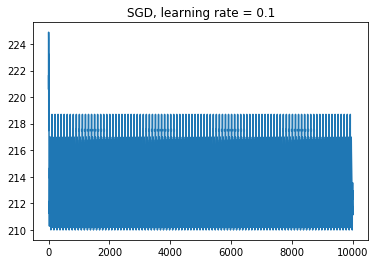

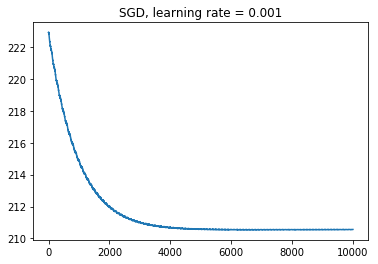

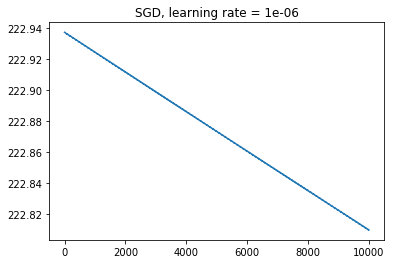

In [27]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(n, d, sigma):
    mu1 = np.random.rand(d,1)
    mu2 = np.random.rand(d,1)
    z = np.random.binomial(1,0.5, size = [1,n])
    X = z*np.random.normal(loc=mu1, scale=sigma, size=[d,n]) + \
    (1-z)*np.random.normal(loc=mu2, scale=sigma, size=[d,n])
    return X

def loss(X, mu1, mu2, sigma):
    d = 4
    V1 = np.exp( - np.linalg.norm(X - mu1, ord='fro') ** 2 / (2 * sigma **2))
    V2 = np.exp( - np.linalg.norm(X - mu2, ord='fro') ** 2 / (2 * sigma **2))
    loss = - np.log(0.5 * (2 * np.pi * sigma **2) ** (d / 2)) - np.log(V1 + V2)
    return np.sum(loss)

def loss_grad_i(X, mu1, mu2, i, sigma): 
    res = X[:,i][:, np.newaxis]
    V1 = np.exp( - np.linalg.norm(res - mu1, ord='fro') ** 2 / (2 * sigma **2))
    V2 = np.exp( - np.linalg.norm(res - mu2, ord='fro') ** 2 / (2 * sigma **2))
    grad_loss_mu1_i = - V1 * ((res - mu1) / (sigma ** 2)) / (V1 + V2)            
    grad_loss_mu2_i = - V2 * ((res - mu2) / (sigma ** 2))/ (V1 + V2)
    return grad_loss_mu1_i.reshape(np.shape(mu1)), grad_loss_mu2_i.reshape(np.shape(mu2))

def sgd_plot(mu1_init, mu2_init, X, sigma, n_steps, learning_rates):
    for learning_rate in learning_rates:
        mu1 = mu1_init[:]
        mu2 = mu2_init[:]
        losses = []
        for step_n in range(n_steps):
            for i in range(X.shape[1]):
                grad_loss_mu1_i, grad_loss_mu2_i = loss_grad_i(X, mu1, mu2, i, sigma)
                mu1 = mu1 - learning_rate * grad_loss_mu1_i
                mu2 = mu2 - learning_rate * grad_loss_mu1_i
                loss_i = loss(X, mu1, mu2, sigma)
                losses.append(loss_i)
        plt.plot(losses)
        plt.title('SGD, learning rate = '+ str(learning_rate))
        plt.show()
    
def main(n, d, sigma, n_steps):
    X = generate_data(n, d, sigma)
    mu1_init = np.random.rand(d,1)
    mu2_init = np.random.rand(d,1)
    sgd_plot(mu1_init, mu2_init, X, sigma, n_steps,learning_rates = [1e-1, 1e-3, 1e-6])
    
main(100,4,1,100)

**`[double click here to add a description]`**

**Q3.3 (bonus)**: There is another algorithm for fitting the mixture models named [EM](http://cs229.stanford.edu/notes/cs229-notes8.pdf) (Expectation maximization). Complete the EM code given below which maximizes the data log-likelihood for the model in Q2.2 and compare its performance with that of SGD.

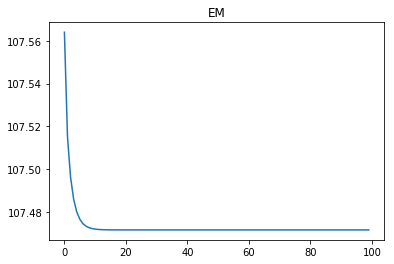

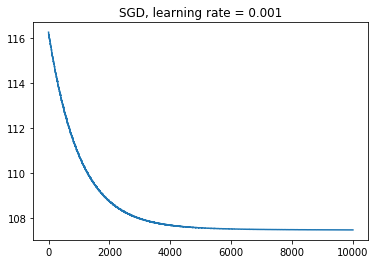

In [3]:
def em_plot(mu1_init, mu2_init, X, sigma, n_steps):
    mu1 = mu1_init[:]
    mu2 = mu2_init[:]
    losses = []
    for iter in range(n_steps):
        # E-step
        
        eta1 = 0 ## -- ! code required
        eta2 = 0 ## -- ! code required
         
        # M-step
        mu1 = 0 ## -- ! code required
        mu2 = 0 ## -- ! code required
        
        loss_i = loss(X, mu1, mu2, sigma)
        losses.append(loss_i)
    plt.plot(losses)
    plt.title('EM')
    plt.show()

def em_main(n, d, sigma, n_steps):
    X = generate_data(n, d, sigma)
    mu1_init = np.random.rand(d,1)
    mu2_init = np.random.rand(d,1)

    em_plot(mu1_init, mu2_init, X, sigma, n_steps)
    sgd_plot(mu1_init, mu2_init, X, sigma, n_steps, learning_rates = [1e-3])
    
em_main(100,4,1,100)

### Problem 4: Logistic Regression

Assume that we observe data generated via the following model:

- $X \in \mathbf R^{n \times d}$;   constant data matrix that we have
- $\theta$ is a $d$-dimensional parameter
- $\varepsilon = (\varepsilon_1, \dots, \varepsilon_n),\  \varepsilon_i \sim \text{Logistic}(0, 1)$;   $\varepsilon$ is $n$-dimensional random noise vector distributed according to [Logistic](https://en.wikipedia.org/wiki/Logistic_distribution) distribution
- and we observe $\mathbf y = \mathbf 1[X \theta + \varepsilon \geq 0]$(boolean random vector)
 

Show that the following holds:

**Q4.1**: $ P(y_i = 1 \ | \ \theta, \mathbf x_i) = \text{logistic}\Big(\theta^T \mathbf x_i\Big)$

 where $ \text{logistic}(x) := \frac{1}{1+\exp(-x)}$ is a standard [logistic function](https://en.wikipedia.org/wiki/Logistic_function#Mathematical_properties), $\mathbf x_i$ denotes $i$-th data sample vector, $\mathbf 1[\dots]$ denotes indicator function
 
 **Hints:** 
 
 - for an event $A$, what is $P(\mathbf 1[A] = 1)$ ? (answer: $P(A)$)
 - for a random variable $\zeta \sim P$ what is $P(\zeta \leq a)$ ? (answer: $F_{\zeta}(a)$, the value of the cumulative density function for the distribution of $\zeta$)

**`[double click here to add a solution]`**
$$
P(y_i = 1 \ | \ \theta, \mathbf x_i) = P(\mathbf 1[X \theta + \varepsilon \geq 0] = 1 \ | \ \theta, \mathbf x_i) =P(\varepsilon_i \ge -\theta^T \mathbf x_i) = 1 - F_{\varepsilon_i}(-\theta^T \mathbf x_i) =1 - \frac{1}{1+\exp\left\{\theta^T \mathbf x_i\right\}} = \frac{1}{1+\exp\left\{-\theta^T \mathbf x_i\right\}} = \text{logistic}\Big(\theta^T \mathbf x_i\Big)
$$

**Q4.2**: $ P(y_i \ | \ \theta, \mathbf x_i) = \text{logistic}(\theta^T \mathbf x_i)^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}$

**`[double click here to add a solution]`**
$$
P(y_i = 1 \ | \ \theta, \mathbf x_i) =  \text{logistic}\Big(\theta^T \mathbf x_i\Big)\\
P(y_i = 0 \ | \ \theta, \mathbf x_i) = 1 - P(y_i = 1 \ | \ \theta, \mathbf x_i) = 1 - \text{logistic}\Big(\theta^T \mathbf x_i\Big)\\
P(y_i \ | \ \theta, \mathbf x_i) = \text{logistic}(\theta^T \mathbf x_i)^{y_i} (1-\text{logistic}(\theta^T \mathbf x_i))^{(1-y_i)}
$$

**Q4.3**: $ \log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i))$

**`[double click here to add a solution]`**
Since:
$$
 P(y_i \ | \ \theta, \mathbf x_i) = (\frac{1}{1+\exp\left\{-\theta^T \mathbf x_i\right\}})^{y_i}(1 -\frac{1}{1+\exp\left\{-\theta^T \mathbf x_i\right\}})^{(1-y_i)}\\
 P(y_i \ | \ \theta, \mathbf x_i) = (\frac{1}{1+\exp\left\{-\theta^T \mathbf x_i\right\}})^{y_i}(\frac{1}{1+\exp\left\{\theta^T \mathbf x_i\right\}})^{(1-y_i)}
\log P(y_i \ | \ \theta, \mathbf x_i) = -y_i\log({1+\exp\left\{-\theta^T \mathbf x_i\right\}}) +(y_i-1)\log({1+\exp\left\{\theta^T \mathbf x_i\right\}}) = y_i(\log({1+\exp\left\{\theta^T \mathbf x_i\right\}}) - \log({1+\exp\left\{-\theta^T \mathbf x_i\right\}})) - \log({1+\exp\left\{\theta^T \mathbf x_i\right\}})=y_i(\log \frac{1+\exp\left\{\theta^T \mathbf x_i\right\}}{1+\exp\left\{-\theta^T \mathbf x_i\right\}})- \log({1+\exp\left\{\theta^T \mathbf x_i\right\}})\\ 
\log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i))
$$

The vector $\mathbf 1_{n \times 1}$ denotes a column of ones.

**Q4.4**: $ \mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) $

**`[double click here to add a solution]`**
$$
\mathcal L_{MLE}(\theta) = \sum_{i=1}^{n} \log P(y_i \ | \ \theta, \mathbf x_i) \\ 
\log P(y_i \ | \ \theta, \mathbf x_i) = y_i \theta^T \mathbf x_i - \log(1 + \exp(\theta^T \mathbf x_i))
$$
Since $\mathbf y = \mathbf 1[X \theta + \varepsilon \geq 0]$, $\mathbf y \in \mathbf R^{n \times 1}$,$X \in \mathbf R^{n \times d}$,$\theta \in \mathbf R^{d \times 1}$, s.t. For the former part we can multiply and sum and for the $\log$ part, It is a $n * 1$ dimensional matrix, to get the sum, using $\mathbf 1_{n \times 1}$.
$$
\mathcal L_{MLE}(\theta) = \log P(\mathbf y \ | \ X, \theta) = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta))
$$

One way of estimating the true weight vector $\theta$ is by finding an MLE estimate. To make use of prior information,  one might want to find the [maximum a posteriori estimation](https://en.wikipedia.org/wiki/Maximum_a_posteriori_estimation) (MAP) that can be derived from likelihood $P(X|\theta)$ and prior $P(\theta)$ over weights as following (Bayes rule):

\begin{align*}
\theta_{MAP} &= \arg\max_\theta P(\theta | X) = \arg\max_\theta \frac{P(X|\theta)P(\theta)}{\int_{\Theta} P(X|\theta)P(\theta) d \theta} = \arg\max_\theta ( \log P(X|\theta) + \log P(\theta) - \log \int_{\Theta} P(X|\theta)P(\theta) d \theta) \\ &= \arg\max_\theta ( \log P(X|\theta) + \log P(\theta) )
\end{align*}

Assume $\theta \sim \mathcal N(0, \sigma_\theta I)$, which essentially means that "weight vector components should not be too far from zero".

**Q4.5**: $\mathcal L_{MAP}(\theta) \triangleq  \log P(X|\theta) + \log P(\theta)  = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) - \lambda \ ||\theta||^2_2 + C$

$\lambda = \frac{1}{2\sigma_\theta}$, $C$ is a term that does not include $\theta$

**`[double click here to add a solution]`**
$$
P(\theta) = \frac{1}{\sqrt{(2\pi\sigma_{theta}^2)}} \exp\left\{\frac{||\theta||^2_2 }{-2\sigma_{\theta}^2}\right\}\\
\log {P(\theta)} = - \lambda \ ||\theta||^2_2 + C
$$
According to the result we get from 4.4 : $\mathcal L_{MAP}(\theta) \triangleq  \log P(X|\theta) + \log P(\theta)  = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) - \lambda \ ||\theta||^2_2 + C$

**Q4.6**: $\frac{\partial \mathcal L_{MAP}(\theta)}{\partial \theta} = X^T(y - \text{logistic}(X\theta))) - 2 \lambda \theta $

**`[double click here to add a solution]`**
$$
\mathcal L_{MAP}(\theta) \triangleq  \log P(X|\theta) + \log P(\theta)  = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) - \lambda \ ||\theta||^2_2 + C\\
\frac{\partial y^\mathrm{T} X \theta}{\partial \theta} = y^\mathrm{T}X = X^\mathrm{T} y, \\ 
\frac{\partial}{\partial \theta} \log(1 + \exp\{X \theta\}) \cdot \mathbf 1_{n \times 1} = \frac{\partial}{\partial \theta} \sum_{i=1}^n \log(1 + \exp\{\mathbf x_i^\mathrm T \theta\}) = \sum_{i=1}^n \frac{\exp\{\mathbf x_i^\mathrm T \theta\}\mathbf x_i^\mathrm T}{1 + \exp\{\mathbf x_i^\mathrm T \theta\}} = \sum_{i=1}^n \mathrm{logstic}\left(\mathbf x_i^\mathrm T \theta\right) x_i^\mathrm T = X^\mathrm{T} \mathrm{logistic}(X\theta)\\
\frac{\partial \left(- \lambda \ ||\theta||^2_2\right)}{\partial \theta} = - 2 \lambda \theta
$$
s.t.
$$
\frac{\partial \mathcal L_{MAP}(\theta)}{\partial \theta} = X^T(y - \text{logistic}(X\theta))) - 2 \lambda \theta
$$

**Q4.7**: What does $\lambda$ stand for?

**`[double click here to add a solution]`**

It adjust the weights. It is the regularization parameter. The larger $\lambda$ is, the smaller the weight vector $\theta$ is. $\theta$ near to 0. It can prevent overfitting.

**Q4.8:** 
Now assume that $\theta$ follows a [Laplace distribution](https://en.wikipedia.org/wiki/Laplace_distribution) i.e: $\theta_i \sim Laplace(0, b),  \forall i $
Repeat the problems Q4.5 & Q4.6 with this new prior

**`[double click here to add a solution]`**
Since we changed to $\theta_i \sim Laplace(0, b),  \forall i $,
$$
P(\theta_i) = \frac{1}{2b}\exp\left\{ - \frac{|\theta_i|}{b}\right\}\\
P(\theta) =  \prod_{i=0}^n P(\theta_i) = \frac{1}{2^nb^n}\exp\left\{ - \sum_{i=1}^n \frac{|\theta_i|}{b}\right\}= \frac{1}{2^nb^n} \exp\left\{\frac{ - ||\theta||_1}{b}\right\}\\
\log P(\theta) = n\log 2b - \frac{ ||\theta||_1}{b}, \lambda = \frac{1}{b}\\
\mathcal L_{MAP}(\theta) \triangleq  \log P(X|\theta) + \log P(\theta)  = y^T X \theta - \mathbf 1_{n \times 1}^T \cdot \log(\mathbf 1_{n \times 1} + \exp(X \theta)) - \lambda \ ||\theta||_1 + C\\
\frac{\partial \mathcal L_{MAP}(\theta)}{\partial \theta} = X^\mathrm{T}\left(y - \mathrm{logistic}(X\theta)\right) - \lambda \mathrm{sign}(\theta)
$$


### Problem 5: Coding Logistic Regression
Here's the code that generates data according to model specification (**Problem 4**) and plots for `k_features=2`.

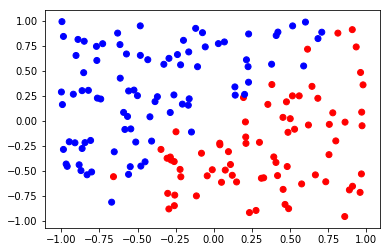

In [33]:
import numpy as np
import matplotlib.pyplot as plt

def generate_logistic_regression_data(n_samples=200, k_featues=2, sigma_eps=0.1, 
                                      sigma_theta=1, feature_correlation_rate=0, train_test_ratio=4):
    assert 0 <= feature_correlation_rate <= 1
    X_noncorr = np.random.rand(n_samples, k_featues)*2-1 # [0, 1] -> [-1, 1] center around zero
    mixture_matrix = np.eye(k_featues)*(1-feature_correlation_rate) + feature_correlation_rate/k_featues
    X = X_noncorr @ mixture_matrix
    theta_real = np.random.normal(scale=sigma_theta, size=k_featues).reshape((-1, 1)) # column
    noise = np.random.logistic(scale=sigma_eps, size=n_samples).reshape((-1, 1))
    y = ((X @ theta_real + noise) > 0).astype(np.int16).reshape((-1,1))
    split_idx = int(n_samples * train_test_ratio / (train_test_ratio + 1))
    return X[:split_idx, :], y[:split_idx], X[split_idx:, :], y[split_idx:], theta_real
def plot_2D_classification_data():
    X,y, _,_ ,theta = generate_logistic_regression_data(200,2,0.1,1,0,4)
    plt.scatter(X[:, 0], X[:, 1], color = [['r', 'b'][c] for c in np.ravel(y)])
    plt.show()
def subfig_iter(it, val_name=None, n_col=2, base_size=(10,2), title=None, fmt='%s'):
    n_rows = int(len(it)/n_col) + len(it) % n_col
    size = (base_size[0], base_size[1]*len(it))
    fig, _axes = plt.subplots(n_rows, n_col, figsize=size)
    for subfig, val in zip(np.ravel(_axes).tolist(), it): 
        yield (val, subfig)
        if val_name is not None:
            if val_name == '':
                subtitle = fmt % (val)
            else:
                subtitle = ('%s = '+fmt) % (val_name, val)
            subfig.set_title(subtitle)
            subfig.legend(loc='best')
    if title is not None:
        fig.suptitle(title, verticalalignment='top')

    
plot_2D_classification_data()

**Q5.1.2**: Explain what happens in this line (use `numpy` documentation to learn about [transposition](https://docs.scipy.org/doc/numpy/reference/generated/numpy.ndarray.T.html), [broadcasting](https://docs.scipy.org/doc/numpy-dev/user/basics.broadcasting.html), [negative indices](https://docs.scipy.org/doc/numpy-dev/user/quickstart.html#automatic-reshaping) for reshaping and [newaxis](https://docs.scipy.org/doc/numpy/reference/arrays.indexing.html#basic-slicing-and-indexing))

    y = ((theta_real.T @ X.T + noise) > 0).astype(np.int16).[:, np.newaxis]

**`[double click here to add a solution]`**

1. theta_real.T is the transpose of matrix of theta_real; X.T is the trnspose of matix of X; (theta_real.T @ X.T + noise) is this two matrix multiply and add noise.
2. Then compare the result with 0, if it is larger than 0 return true or else return false.
3. Using .astype(np.int16) change the boolean type to int16 number 0,1.
4. Using [:, np.newaxis] make it as column vector by inserting an axis along second dimension.

**Q5.2**: Why did we implement $\text{softplus}(x) = \log(1+\exp(x))$ as shown below? What is numerical under- and overflow and how people deal with it?

**`[double click here to add a solution]`**

A numerical overflow means that the algorithm generated a variable that is greater than the maximum allowed for that type of variable.  That is due to the fact that computers use a finite number of bits to represent numbers, so it is not possible to represent ANY number, but only a limited subset of them. A numerical underflow is a condition in a computer program where the result of a calculation is a number of smaller absolute value than the computer can actually represent in memory on its CPU. 

People usually using  algebraic trickery to avoid overflow and underflow.  The most common way is to  use logarithms to avoid overflow/underflow: take the logarithm of the expression you want to evaluate and then exponentiate the result.

We implement $\text{softplus}(x) = \log(1+\exp(x))$ to avoid overflow when x is too large and underflow when x is too small.

In [34]:
import numpy as np

def softplus(x_, limit=5):
    x = np.array(x_)
    compute_real_mask = np.logical_and(-limit < x, x < limit)
    return_same_mask = x >= limit
    computed_real_part = np.log(1 + np.exp(x*compute_real_mask)*compute_real_mask)
    returned_same_part = x*return_same_mask
    return computed_real_part + returned_same_part

def test_softplus():
    x_arr = np.linspace(-200, 200)
    softplus_true = np.log(1 + np.exp(x_arr))
    softplus_stable = softplus(x_arr)
    assert np.max(abs(softplus_true-softplus_stable)) < 1e-3
    
test_softplus()

def logistic(x):
    return 1/(1+np.exp(-x))

**Q5.3**: Write (by filling in the missing code below) Gradient Descent and Stochastic Gradient Descent algorithm for the MAP loss and plot 

- MAP loss
- L1 distance between current theta and true one
- cosine distance between current theta and true one

use results from **Q4.8**. Note that our loss is $loss(\theta) = -\mathcal L(\theta)$ and it is usually referred as "the negative log-likelihood".

In [35]:
from numpy.linalg import norm
from scipy.spatial.distance import cosine
import matplotlib.cm as cm

def logistic_MAP_loss(X, y, theta_current, lambd):
    loss = - y.T @ X @ theta_current  + np.sum(softplus(X @ theta_current)) + lambd * norm(theta_current, ord=1)
    return loss
def logistic_MAP_loss_gradient(X, y, theta_current, lambd):
    grad = -X.T @ (y - logistic(X @ theta_current)) + lambd * np.sign(theta_current)
    return grad

def logistic_MAP_loss_single_gradient(X, y, smaple_id, theta_current, lambd):
    x_i = X[smaple_id].reshape((1, -1))
    y_i = y[smaple_id].reshape((1, 1))
    return logistic_MAP_loss_gradient(x_i, y_i, theta_current, lambd)

def logistic_classification_accuracy(X, y, theta_current):
    yp = X@theta_current > 0
    return (len(y)-np.sum(np.abs(y - yp)))/len(y)

def run_MAP_gd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        theta = theta - learning_rate * logistic_MAP_loss_gradient(X, y, theta, lambd)
        pass
        steps.append(np.copy(theta))
    return steps

def run_MAP_sgd(X, y, lambd, learning_rate = 0.01, max_epoch_n=200, init_theta=None):
    theta = init_theta if init_theta is not None else np.ones((X.shape[1], 1))*5
    steps = []
    for epoch_n in range(max_epoch_n):
        for smaple_id in range(X.shape[0]):
            theta = theta - learning_rate * logistic_MAP_loss_single_gradient(X, y, smaple_id, theta, lambd)
            pass
        steps.append(np.copy(theta))
    
    return steps

gd runtime: 0.12737999999999516
sgd runtime: 2.329616999999999


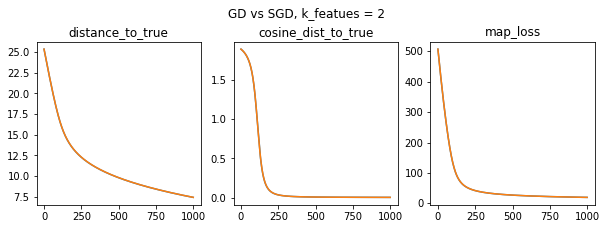

gd runtime: 0.35390999999999906
sgd runtime: 3.0407200000000003


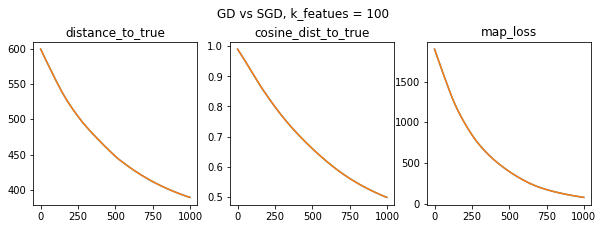

In [39]:
import time

def draw_gd_plots(axes, theta_steps, X, y, lambd, theta_real):
    collected_val_dicts = []
    for theta in theta_steps:
        collected_val_dicts.append({
                'distance_to_true': np.linalg.norm(theta-theta_real,1),
                'cosine_dist_to_true': cosine(theta, theta_real),
                'map_loss': float(logistic_MAP_loss(X, y, theta, lambd)),
            })
        
    
    for plot_id, key in enumerate(collected_val_dicts[0].keys()):
        subfig = axes[plot_id]
        subfig.set_title(key)
        subfig.plot(list(d[key] for d in collected_val_dicts))

def main():
    for k_featues in [2, 100]:
        data_args = {'n_samples': 200, 'k_featues': k_featues, 'sigma_eps': 0.3, 
                     'sigma_theta': 5, 'feature_correlation_rate': 0}
        data = generate_logistic_regression_data(**data_args)
        X_train, y_train, X_test, y_test, theta_real = data
        fig, axes = plt.subplots(1, 3, figsize=(10,3))
        lamdb = 0
        
        now = time.clock()
        steps = run_MAP_gd(X_train, y_train, lamdb, learning_rate=1e-3, max_epoch_n=1000)
        draw_gd_plots(axes, steps, X_train, y_train, lamdb, theta_real)
        print('gd runtime:', time.clock() - now)
        
        now = time.clock()
        steps = run_MAP_sgd(X_train, y_train, lamdb, learning_rate=1e-3, max_epoch_n=1000)
        draw_gd_plots(axes, steps, X_train, y_train, lamdb, theta_real)
        fig.suptitle('GD vs SGD, k_featues = %d' % k_featues, verticalalignment='bottom')
        print('sgd runtime:', time.clock() - now)
        
        plt.show()
    
main()

**Q5.3.1**: We expect loss to gradually decrease. Re-run code above several times (sgd might work differently). Explain plots above.

**`[double click here to add a description]`**

It is hard to distinguish GD and SGD in the same picture, and it seems both GD and SGD converge on these data. SGD need more time. It is a special case of mini-batch GD which is there is only one data in each batch. It needs a lot of time to converge. The more features we use, the more time it takes because the complexity of computation increased.

**Q5.4**: Complete the provided code below, and use it to draw several contour plots of logistic loss with different regularization parameters. Explain your results.

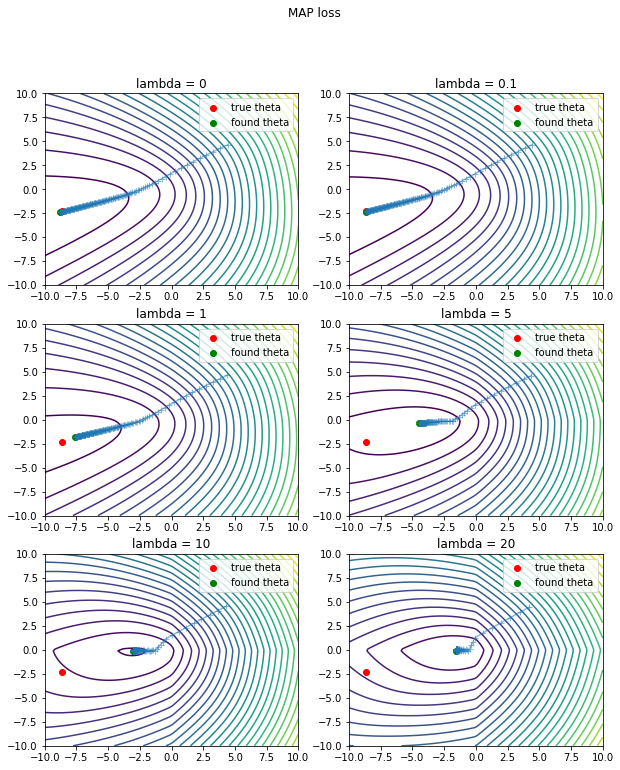

In [41]:
from itertools import product

def draw_f_contour(subfig, f, x_limits, n_lines=30, n=100):
    space = [np.linspace(*x_limit, n) for x_limit in x_limits]
    f_vals = np.array([f(np.array(v)) for v in product(*space)]).reshape(n, n).T
    subfig.set_xlim(*x_limits[0])
    subfig.set_ylim(*x_limits[1])
    subfig.contour(*space, f_vals, n_lines)
    
def draw_gd_steps(subfig, steps, func, theta_real):
    around_space = list([-10, 10] for coord in theta_real)
    draw_f_contour(subfig, func, around_space)
    subfig.plot(np.hstack(steps)[0], np.hstack(steps)[1], marker='+', alpha=0.5)
    subfig.scatter(*np.ravel(theta_real), c='r', label='true theta')
    theta_best = steps[-1]
    subfig.scatter(*np.ravel(theta_best), c='g', label='found theta') 

def main():
    data_args = dict(n_samples=200, k_featues=2, sigma_eps=0.1, sigma_theta=5)
    data = generate_logistic_regression_data(**data_args)
    X_train, y_train, X_test, y_test, theta_real = data
    
    lambds = [0, 0.1, 1, 5, 10, 20]
    for lambd, subfig in subfig_iter(lambds, val_name='lambda', title='MAP loss'):
        steps = run_MAP_gd(X_train, y_train, lambd)
        draw_func = lambda theta: logistic_MAP_loss(X_train, y_train, theta, lambd)
        draw_gd_steps(subfig, steps, draw_func, theta_real)
    plt.show()

main()

**`[double click here to add a description]`**

With the increase of $\lambda$, it is harder to get the true theta.

**Q5.5**: Using the provided code below, draw several contour plots of logistic loss with different number of used samples. Explain your results.

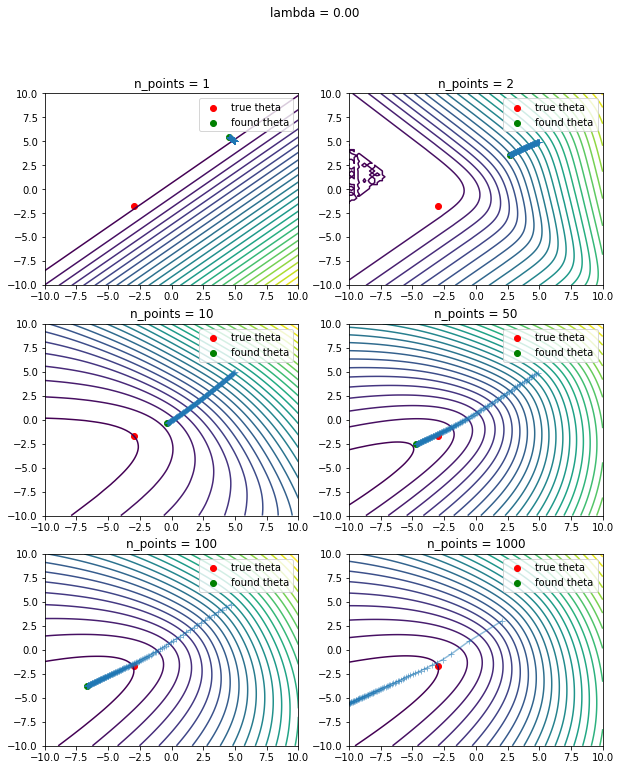

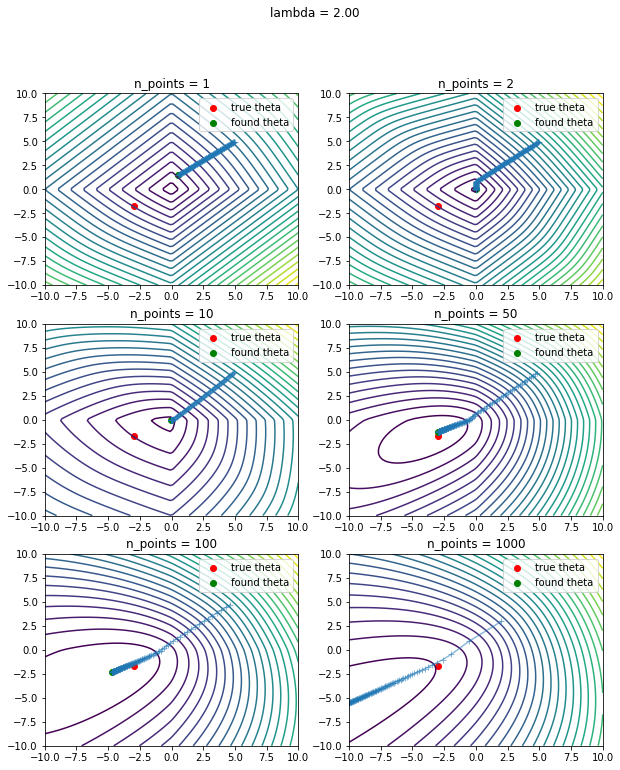

In [42]:
def main():
    data_args = dict(n_samples=1000, k_featues=2, sigma_eps=0.1, sigma_theta=3)
    data = generate_logistic_regression_data(**data_args)
    X_train, y_train, X_test, y_test, theta_real = data

    for lambd in [0.0, 2.0]:    
        n_points_s = [1, 2, 10, 50, 100, 1000]
        figure_args = dict(val_name='n_points', title='lambda = %.2f' % lambd)
        for n_points, subfig in subfig_iter(n_points_s, **figure_args):
            cropped_xy = (X_train[:n_points], y_train[:n_points])
            steps = run_MAP_gd(*cropped_xy, lambd)
            draw_func = lambda th: logistic_MAP_loss(*cropped_xy, th, lambd)
            draw_gd_steps(subfig, steps, draw_func, theta_real)
        plt.show()
        
main()

**`[double click here to add a description]`**

Using too many data points to train a simple model may cause overfitting. $lambda$ which is the regularization parameter. It can be used to prevent overfiting.

**Q5.6**: Using the provided code below, draw several contour plots of logistic loss with different degrees of feature interdependence. Explain your results.

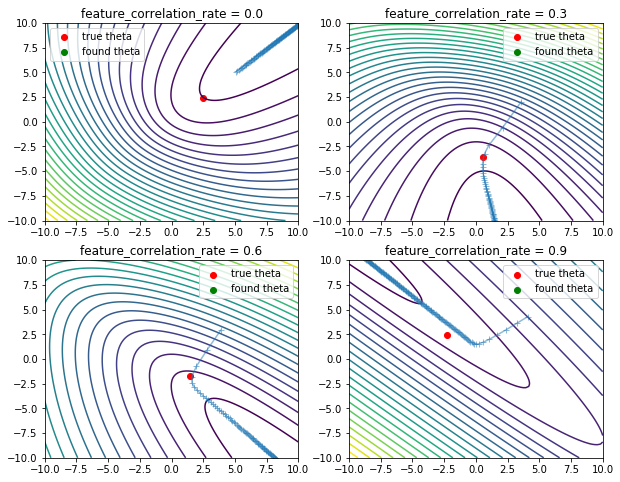

In [43]:
def main():
    data_args = dict(n_samples=1000, k_featues=2, sigma_eps=0.1, sigma_theta=3)
    rates = np.linspace(0, 0.9, 4)
    for feature_correlation_rate, subfig in subfig_iter(rates, val_name='feature_correlation_rate'):
        data_args['feature_correlation_rate'] = feature_correlation_rate
        data = generate_logistic_regression_data(**data_args)
        X_train, y_train, X_test, y_test, theta_real = data
        steps = run_MAP_gd(X_train, y_train, 0)
        draw_func = lambda th: logistic_MAP_loss(X_train, y_train, th, 0)
        draw_gd_steps(subfig, steps, draw_func, theta_real)
    plt.show()

main()

**`[double click here to add a description]`**

With the feature correlation rate increasing, the training result will be away from the true result. Because when the two features are very similar, they can not stand for two features so that it can not discribe the dataset correctly.

.

.

.

Wow, you made it this far, that is impressive. Congratulations!